# Make plots of picks from ELEP

In [2]:
import os
import sys
import pandas as pd
# from obspy import UTCDateTime,Stream
# from obspy.clients.fdsn import Client
# from pnwstore.mseed import WaveformClient
# from obspy.geodetics import locations2degrees, degrees2kilometers
# import matplotlib.pyplot as plt
# import numpy as np
# from mpl_toolkits.basemap import Basemap
# from tqdm import tqdm
import datetime
notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, '../'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from plot_utils_temp import *


In [32]:
# Define clients
client_iris = Client("IRIS")
client_pnw = WaveformClient()
client_ncedc = Client('NCEDC')

In [33]:
_df = pd.read_csv('../data/datasets_all_regions/origin_2010_2015_reloc_cog_morton_ver3.csv')
_df['datetime'] = _df.apply(lambda a: datetime.fromtimestamp(a['time'], tz=timezone.utc), axis=1)
_df


,Unnamed: 0,lat,lon,depth,time,orid,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,id_Morton,dist,dt,NonDimDist,datetime
0,0,47.22533,-122.16895,56.111,1.262305e+09,0,7,2,5,1.081,5.0,235.831208,genie,0,0.753784,4.933721e+07,411143.414481,2010-01-01 00:15:17.262282+00:00
1,1,48.19518,-121.77276,3.820,1.262305e+09,1,55,25,30,0.985,30.0,201.698107,genie,0,1.333054,4.933712e+07,411142.646872,2010-01-01 00:16:49.375360+00:00
2,2,47.86208,-122.09903,17.799,1.262330e+09,2,28,10,18,0.784,18.0,181.023074,genie,0,0.957326,4.931184e+07,410932.027590,2010-01-01 07:18:03.689209+00:00
3,3,47.96435,-122.91906,21.286,1.262336e+09,3,20,10,10,0.465,10.0,150.528010,genie,0,0.684951,4.930621e+07,410885.088574,2010-01-01 08:51:56.371091+00:00
4,4,45.87262,-122.19180,9.822,1.262362e+09,4,39,20,19,0.657,19.0,237.324295,genie,0,1.627692,4.927976e+07,410664.693011,2010-01-01 16:12:43.838660+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,63882,40.59439,-124.42438,19.741,1.435097e+09,63882,23,9,14,1.015,14.0,73.959960,genie,4408,0.112501,7.919735e+03,65.997794,2015-06-23 22:11:15.735288+00:00
63883,63883,40.54636,-127.10076,26.165,1.435100e+09,63883,12,1,11,0.744,11.0,223.080984,genie,4408,2.139193,9.995899e+03,83.299204,2015-06-23 22:45:51.899203+00:00
63884,63884,49.74167,-124.58578,5.274,1.435101e+09,63884,13,7,6,0.894,6.0,197.904075,genie,4408,9.188393,1.107364e+04,92.281049,2015-06-23 23:03:49.638010+00:00
63885,63885,40.64363,-125.36531,1.891,1.435101e+09,63885,8,3,5,0.982,5.0,145.748415,genie,4408,0.824720,1.158579e+04,96.548245,2015-06-23 23:12:21.788775+00:00


## Load catalogs from Morton (2023) and ANSS

In [6]:
# Read Morton's catalog
events_morton = pd.read_csv('../data/ds01.csv')
# Convert the TSTRING to datetime
events_morton['datetime'] = pd.to_datetime(events_morton['TSTRING'], format='%Y%m%d%H%M%S', utc=True)
# Get the events in the Morton catalog 
# t1 = pd.Timestamp('2011-1-1 00:00:00.000000+0000', tz='UTC')
# t2 = pd.Timestamp('2015-12-31 23:59:59.999999+0000', tz='UTC')

# events_morton= events_morton.loc[(events_morton['datetime'] > t1) & (events_morton['datetime'] < t2) ]

events_morton.head()

,CI YEAR,TSTRING,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,...,dist to nearest stn,tt RMS,ERH,ERZ,STRIKE,DIP,RAKE,PLATE DESIGNATION,TEMPLATE EVENT?,datetime
0,1,2.011073e+13,2011,7,26,1,2,7.37,47.3217,-123.2708,...,27.4,0.19,0.8,1.2,NaN,NaN,NaN,Interface,Catalog,2011-07-26 01:02:07+00:00
1,1,2.011073e+13,2011,7,26,1,2,7.72,44.2888,-124.3340,...,163.8,0.06,13.1,3.2,NaN,NaN,NaN,Upper Plate,NaN,2011-07-26 01:02:07+00:00
2,1,2.011073e+13,2011,7,26,1,2,8.56,44.3017,-124.3180,...,131.1,0.50,35.4,22.2,NaN,NaN,NaN,Upper Plate,NaN,2011-07-26 01:02:08+00:00
3,1,2.011073e+13,2011,7,26,7,31,2.17,48.2635,-124.9298,...,44.4,0.77,3.5,6.4,NaN,NaN,NaN,Upper Plate,NaN,2011-07-26 07:31:02+00:00
4,1,2.011073e+13,2011,7,26,9,50,27.63,48.3032,-124.9157,...,46.1,0.94,4.0,6.9,NaN,NaN,NaN,Upper Plate,T,2011-07-26 09:50:27+00:00


In [7]:
events_anss = pd.read_csv('../data/datasets_anss/anss_2010-15.csv')
events_anss['datetime'] = pd.to_datetime(events_anss['time'], format='%Y-%m-%dT%H:%M:%S.%fZ', utc=True)
# events_anss= events_anss.loc[(events_anss['datetime'] > t1) & (events_anss['datetime'] < t2) ]
events_anss

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,datetime
0,0,2010-01-01T00:16:49.190Z,48.203167,-121.676833,2.948,2.20,md,16.0,79.0,0.167900,...,"8 km SW of Darrington, Washington",earthquake,1.004,12.60,0.070,9.0,reviewed,uw,uw,2010-01-01 00:16:49.190000+00:00
1,1,2010-01-01T01:09:53.550Z,38.755167,-122.717167,1.604,0.20,md,9.0,67.0,0.015320,...,"7 km S of Cobb, California",earthquake,0.500,1.19,0.175,4.0,reviewed,nc,nc,2010-01-01 01:09:53.550000+00:00
2,2,2010-01-01T01:28:40.410Z,38.824167,-122.814667,1.479,0.29,md,15.0,90.0,0.003604,...,"7 km W of Cobb, California",earthquake,0.250,0.33,0.273,4.0,reviewed,nc,nc,2010-01-01 01:28:40.410000+00:00
3,3,2010-01-01T01:28:44.590Z,38.825500,-122.815333,1.859,0.65,md,7.0,106.0,0.004505,...,"8 km W of Cobb, California",earthquake,1.220,1.78,NaN,1.0,reviewed,nc,nc,2010-01-01 01:28:44.590000+00:00
4,4,2010-01-01T01:45:21.220Z,38.813332,-122.785500,0.739,0.97,md,15.0,56.0,0.009009,...,"5 km W of Cobb, California",earthquake,0.200,0.49,0.120,16.0,automatic,nc,nc,2010-01-01 01:45:21.220000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151785,151785,2015-12-31T22:15:46.650Z,38.837502,-122.825333,1.450,0.18,md,6.0,180.0,0.008108,...,"9 km W of Cobb, California",earthquake,0.660,1.08,0.110,2.0,automatic,nc,nc,2015-12-31 22:15:46.650000+00:00
151786,151786,2015-12-31T22:18:13.120Z,41.856400,-119.599200,8.700,1.40,ml,6.0,210.1,0.175000,...,"45 km E of Fort Bidwell, California",earthquake,NaN,3.40,0.210,3.0,reviewed,nn,nn,2015-12-31 22:18:13.120000+00:00
151787,151787,2015-12-31T23:19:21.650Z,38.823334,-122.765663,1.680,0.54,md,7.0,99.0,0.008108,...,"3 km W of Cobb, California",earthquake,0.500,1.54,0.030,2.0,automatic,nc,nc,2015-12-31 23:19:21.650000+00:00
151788,151788,2015-12-31T23:22:20.730Z,38.841000,-122.878166,1.730,0.77,md,8.0,95.0,0.007207,...,"12 km ENE of Cloverdale, California",earthquake,0.580,1.02,0.180,3.0,automatic,nc,nc,2015-12-31 23:22:20.730000+00:00


## (a)

In [88]:
# Good association: Offshore WA
event_a = _df.loc[(_df['lat']>=46.97)&(_df['lat']<=46.99)&(_df['lon']<=-124.74)&(_df['lon']>=-124.76)]
event_a

,Unnamed: 0,lat,lon,depth,time,orid,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,id_Morton,dist,dt,NonDimDist,datetime
52800,52800,46.97998,-124.75515,15.409,1.413533e+09,52800,81,38,43,0.96,43.0,83.470991,genie,2513,6.569731,9487.333491,79.061549,2014-10-17 07:58:38.666509+00:00


In [89]:

# Localize (not convert) the naive timestamp to UTC
time_center = pd.to_datetime(event_a['datetime'].values[0]).tz_localize('UTC')
time_window = pd.to_timedelta(120, unit='s')

# Apply mask to timezone-aware datetimes
mask = (events_morton['datetime'] >= time_center - time_window) & \
       (events_morton['datetime'] <= time_center + time_window)

events_morton.loc[mask]


,CI YEAR,TSTRING,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,...,dist to nearest stn,tt RMS,ERH,ERZ,STRIKE,DIP,RAKE,PLATE DESIGNATION,TEMPLATE EVENT?,datetime


In [90]:

# Localize (not convert) the naive timestamp to UTC
time_center = pd.to_datetime(event_a['datetime'].values[0]).tz_localize('UTC')
time_window = pd.to_timedelta(120, unit='s')

# Apply mask to timezone-aware datetimes
mask = (events_anss['datetime'] >= time_center - time_window) & \
       (events_anss['datetime'] <= time_center + time_window)

events_anss.loc[mask]

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,datetime
119619,119619,2014-10-17T07:58:38.470Z,46.965167,-124.867833,39.643,1.59,md,18.0,244.0,0.7488,...,"54 km W of Oyehut, Washington",earthquake,2.02,0.96,0.107,5.0,reviewed,uw,uw,2014-10-17 07:58:38.470000+00:00


## (b)

In [91]:
# Good association: Offshore OR
event_b = _df.loc[(_df['lat']>=44.37)&(_df['lat']<=44.39)&(_df['lon']<=-124.45)&(_df['lon']>=-124.47)].iloc[2]
event_b

Unnamed: 0                               20052
lat                                   44.38373
lon                                 -124.46256
depth                                   10.063
time                         1332235717.680858
orid                                     20052
nass                                        80
p_picks                                     43
s_picks                                     37
rms                                      1.206
nsphz                                     37.0
gap                                  70.022537
algorithm                                genie
id_Morton                                  194
dist                                  0.048454
dt                                    0.680858
NonDimDist                            0.005996
datetime      2012-03-20 09:28:37.680858+00:00
Name: 20052, dtype: object

In [92]:
event_b['datetime']

Timestamp('2012-03-20 09:28:37.680858+0000', tz='UTC')

In [93]:

# Localize (not convert) the naive timestamp to UTC
time_center = pd.to_datetime(event_b['datetime'])
time_window = pd.to_timedelta(120, unit='s')

# Apply mask to timezone-aware datetimes
mask = (events_morton['datetime'] >= time_center - time_window) & \
       (events_morton['datetime'] <= time_center + time_window)

events_morton.loc[mask]

,CI YEAR,TSTRING,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,...,dist to nearest stn,tt RMS,ERH,ERZ,STRIKE,DIP,RAKE,PLATE DESIGNATION,TEMPLATE EVENT?,datetime
194,1,2.012032e+13,2012,3,20,9,28,37.0,44.3517,-124.4117,...,21.5,0.42,0.9,2.0,NaN,NaN,NaN,Interface,T,2012-03-20 09:28:37+00:00


In [94]:

# Localize (not convert) the naive timestamp to UTC
time_center = pd.to_datetime(event_b['datetime'])
time_window = pd.to_timedelta(120, unit='s')

# Apply mask to timezone-aware datetimes
mask = (events_anss['datetime'] >= time_center - time_window) & \
       (events_anss['datetime'] <= time_center + time_window)

events_anss.loc[mask]

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,datetime
52043,52043,2012-03-20T09:28:37.350Z,44.383333,-124.456333,32.93,3.7,ml,16.0,228.0,0.3795,...,"29 km WNW of Yachats, Oregon",earthquake,0.81,1.07,0.18,82.0,reviewed,uw,uw,2012-03-20 09:28:37.350000+00:00


## (c)

In [95]:
# Good association: Northern California
event_c = _df.loc[(_df['lat']>=40.84)&(_df['lat']<=40.86)&(_df['lon']<=-123.36)&(_df['lon']>=-123.38)]
event_c

,Unnamed: 0,lat,lon,depth,time,orid,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,id_Morton,dist,dt,NonDimDist,datetime
55331,55331,40.85222,-123.3666,26.107,1.418415e+09,55331,22,10,12,1.586,12.0,102.274632,genie,2924,0.047893,1.349966,0.011412,2014-12-12 20:16:44.349966+00:00


In [96]:

# Localize (not convert) the naive timestamp to UTC
time_center = pd.to_datetime(event_c['datetime'].values[0]).tz_localize('UTC')
time_window = pd.to_timedelta(120, unit='s')

# Apply mask to timezone-aware datetimes
mask = (events_morton['datetime'] >= time_center - time_window) & \
       (events_morton['datetime'] <= time_center + time_window)

events_morton.loc[mask]

,CI YEAR,TSTRING,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,...,dist to nearest stn,tt RMS,ERH,ERZ,STRIKE,DIP,RAKE,PLATE DESIGNATION,TEMPLATE EVENT?,datetime
2924,4,2.014121e+13,2014,12,12,20,16,43.27,40.888,-123.3245,...,26.8,0.1,0.6,1.4,164.24,63.48,26.76,Interface,NaN,2014-12-12 20:16:43+00:00


In [97]:

# Localize (not convert) the naive timestamp to UTC
time_center = pd.to_datetime(event_c['datetime'].values[0]).tz_localize('UTC')
time_window = pd.to_timedelta(120, unit='s')

# Apply mask to timezone-aware datetimes
mask = (events_anss['datetime'] >= time_center - time_window) & \
       (events_anss['datetime'] <= time_center + time_window)

events_anss.loc[mask]

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,datetime


## (d)

In [98]:
# Bad association:Northern California
event_d = _df.loc[(_df['lat']>=40.52)&(_df['lat']<=40.54)&(_df['lon']<=-124.73)&(_df['lon']>=-124.75)].iloc[3]
event_d

Unnamed: 0                                 535
lat                                   40.53275
lon                                 -124.73816
depth                                   11.093
time                         1263264837.458611
orid                                       535
nass                                         8
p_picks                                      3
s_picks                                      5
rms                                        0.2
nsphz                                      5.0
gap                                 258.774701
algorithm                                genie
id_Morton                                    1
dist                                   3.76787
dt                             48377289.541389
NonDimDist                       403144.079512
datetime      2010-01-12 02:53:57.458611+00:00
Name: 535, dtype: object

In [99]:
event_d['datetime']

Timestamp('2010-01-12 02:53:57.458611+0000', tz='UTC')

In [100]:

# Localize (not convert) the naive timestamp to UTC
time_center = pd.to_datetime(event_d['datetime'])
time_window = pd.to_timedelta(120, unit='s')

# Apply mask to timezone-aware datetimes
mask = (events_morton['datetime'] >= time_center - time_window) & \
       (events_morton['datetime'] <= time_center + time_window)

events_morton.loc[mask]

,CI YEAR,TSTRING,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,...,dist to nearest stn,tt RMS,ERH,ERZ,STRIKE,DIP,RAKE,PLATE DESIGNATION,TEMPLATE EVENT?,datetime


In [101]:

# Localize (not convert) the naive timestamp to UTC
time_center = pd.to_datetime(event_d['datetime'])
time_window = pd.to_timedelta(120, unit='s')

# Apply mask to timezone-aware datetimes
mask = (events_anss['datetime'] >= time_center - time_window) & \
       (events_anss['datetime'] <= time_center + time_window)

events_anss.loc[mask]

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,datetime
640,640,2010-01-12T02:53:36.370Z,40.5075,-124.882,14.078,3.18,ml,37.0,243.0,0.4162,...,"52 km W of Ferndale, California",earthquake,1.39,0.69,0.165,17.0,reviewed,nc,nc,2010-01-12 02:53:36.370000+00:00


## (e)

In [102]:
# Bad association: Columbia River
event_e = _df.loc[(_df['lat']>=46.24)&(_df['lat']<=46.26)&(_df['lon']<=-122.69)&(_df['lon']>=-122.71)]
event_e

,Unnamed: 0,lat,lon,depth,time,orid,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,id_Morton,dist,dt,NonDimDist,datetime
29,29,46.24845,-122.70049,47.728,1.262489e+09,29,8,6,2,0.443,2.0,252.366215,genie,0,1.142079,4.915355e+07,409612.903718,2010-01-03 03:16:18.553785+00:00


In [103]:

# Localize (not convert) the naive timestamp to UTC
time_center = pd.to_datetime(event_e['datetime'].values[0]).tz_localize('UTC')
time_window = pd.to_timedelta(120, unit='s')

# Apply mask to timezone-aware datetimes
mask = (events_morton['datetime'] >= time_center - time_window) & \
       (events_morton['datetime'] <= time_center + time_window)

events_morton.loc[mask]

,CI YEAR,TSTRING,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,...,dist to nearest stn,tt RMS,ERH,ERZ,STRIKE,DIP,RAKE,PLATE DESIGNATION,TEMPLATE EVENT?,datetime


In [104]:

# Localize (not convert) the naive timestamp to UTC
time_center = pd.to_datetime(event_e['datetime'].values[0]).tz_localize('UTC')
time_window = pd.to_timedelta(120, unit='s')

# Apply mask to timezone-aware datetimes
mask = (events_anss['datetime'] >= time_center - time_window) & \
       (events_anss['datetime'] <= time_center + time_window)

events_anss.loc[mask]

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,datetime


## (f)

In [105]:
# Bad association: Offshore OR
event_f = _df.loc[(_df['lat']>=41.83)&(_df['lat']<=41.85)&(_df['lon']<=-124.94)&(_df['lon']>=-124.96)]
event_f

,Unnamed: 0,lat,lon,depth,time,orid,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,id_Morton,dist,dt,NonDimDist,datetime
54736,54736,41.83504,-124.9547,57.795,1.417095e+09,54736,11,5,6,1.51,6.0,167.808554,genie,2838,1.430578,6845.349945,57.044612,2014-11-27 13:28:35.349945+00:00


In [106]:

# Localize (not convert) the naive timestamp to UTC
time_center = pd.to_datetime(event_f['datetime'].values[0]).tz_localize('UTC')
time_window = pd.to_timedelta(120, unit='s')

# Apply mask to timezone-aware datetimes
mask = (events_morton['datetime'] >= time_center - time_window) & \
       (events_morton['datetime'] <= time_center + time_window)

events_morton.loc[mask]

,CI YEAR,TSTRING,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,...,dist to nearest stn,tt RMS,ERH,ERZ,STRIKE,DIP,RAKE,PLATE DESIGNATION,TEMPLATE EVENT?,datetime


In [107]:

# Localize (not convert) the naive timestamp to UTC
time_center = pd.to_datetime(event_f['datetime'].values[0]).tz_localize('UTC')
time_window = pd.to_timedelta(120, unit='s')

# Apply mask to timezone-aware datetimes
mask = (events_anss['datetime'] >= time_center - time_window) & \
       (events_anss['datetime'] <= time_center + time_window)

events_anss.loc[mask]

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,datetime
123671,123671,2014-11-27T13:27:41.810Z,38.807835,-122.793503,0.45,0.52,md,9.0,116.0,0.001802,...,"6 km WSW of Cobb, California",earthquake,0.6,0.82,0.02,2.0,automatic,nc,nc,2014-11-27 13:27:41.810000+00:00


### Plot the figure

In [31]:
_df = pd.read_csv('../data/datasets_all_regions/origin_2010_2015_reloc_cog_morton_ver3.csv',index_col=0)
_df["time"] = _df["time"].apply(datetime.fromtimestamp, tz=timezone.utc)

df_arrival = pd.read_csv('../data/datasets_all_regions/arrival_2010_2015_reloc_cog_ver3.csv',index_col=0)

df_assoc = pd.read_csv('../data/datasets_all_regions/assoc_2010_2015_reloc_cog_ver3.csv',index_col=0)[['orid','arid','sta']]

df_picks = df_assoc.merge(df_arrival, on='arid', how='inner')[['orid','arid','sta','iphase','time']]
df_picks = df_picks.rename(columns={'time':'time_pick'})
df_pick_assignments = _df.merge(df_picks, on='orid', how='inner')

df_pick_assignments = df_pick_assignments.rename(columns={'orid':'idx','sta':'station','iphase':'phase','datetime':'time','arid':'pick_idx','lat':'latitude','lon':'longitude'})


picks = df_pick_assignments



# pick_idx = picks.idx.unique()[:]
# picks_selected = picks[picks.idx.isin(pick_idx)]
# picks_selected.loc[:, 'phase'] = picks_selected['phase'].str.replace(' ', '')
# picks_selected.loc[:, 'station'] = picks_selected['station'].str.replace(' ', '')
# picks_selected.loc[:, 'station'] = picks_selected['station'].apply(lambda x: x + '.')

In [32]:
picks

,latitude,longitude,depth,time,idx,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,id_Morton,dist,dt,NonDimDist,pick_idx,station,phase,time_pick
0,47.22533,-122.16895,56.111,2010-01-01 00:15:17.262282+00:00,0,7,2,5,1.081,5.0,235.831208,genie,0,0.753784,4.933721e+07,411143.414481,0,UW.PCMD,P,2010-01-01T00:15:27.180000Z
1,47.22533,-122.16895,56.111,2010-01-01 00:15:17.262282+00:00,0,7,2,5,1.081,5.0,235.831208,genie,0,0.753784,4.933721e+07,411143.414481,1,UW.RVW,P,2010-01-01T00:15:37.840400Z
2,47.22533,-122.16895,56.111,2010-01-01 00:15:17.262282+00:00,0,7,2,5,1.081,5.0,235.831208,genie,0,0.753784,4.933721e+07,411143.414481,2,UW.PCMD,S,2010-01-01T00:15:33.280000Z
3,47.22533,-122.16895,56.111,2010-01-01 00:15:17.262282+00:00,0,7,2,5,1.081,5.0,235.831208,genie,0,0.753784,4.933721e+07,411143.414481,3,UW.GNW,S,2010-01-01T00:15:42.002000Z
4,47.22533,-122.16895,56.111,2010-01-01 00:15:17.262282+00:00,0,7,2,5,1.081,5.0,235.831208,genie,0,0.753784,4.933721e+07,411143.414481,4,PB.B013,S,2010-01-01T00:15:43.618400Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004330,43.37085,-127.35251,5.915,2015-06-23 23:18:18.841147+00:00,63886,9,4,5,0.447,5.0,247.683119,genie,4408,3.622500,1.194284e+04,99.523782,1004330,7D.J11D,S,2015-06-23T23:18:40.885798Z
1004331,43.37085,-127.35251,5.915,2015-06-23 23:18:18.841147+00:00,63886,9,4,5,0.447,5.0,247.683119,genie,4408,3.622500,1.194284e+04,99.523782,1004331,7D.G35D,S,2015-06-23T23:18:48.573898Z
1004332,43.37085,-127.35251,5.915,2015-06-23 23:18:18.841147+00:00,63886,9,4,5,0.447,5.0,247.683119,genie,4408,3.622500,1.194284e+04,99.523782,1004332,7D.J19D,S,2015-06-23T23:18:50.458298Z
1004333,43.37085,-127.35251,5.915,2015-06-23 23:18:18.841147+00:00,63886,9,4,5,0.447,5.0,247.683119,genie,4408,3.622500,1.194284e+04,99.523782,1004333,7D.J10D,S,2015-06-23T23:18:56.689277Z


In [37]:

picks.loc[picks['idx']==29]

,latitude,longitude,depth,time,idx,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,id_Morton,dist,dt,NonDimDist,pick_idx,station,phase,time_pick
576,46.24845,-122.70049,47.728,2010-01-03 03:16:18.553785+00:00,29,8,6,2,0.443,2.0,252.366215,genie,0,1.142079,4.915355e+07,409612.903718,576,UW.LCW,P,2010-01-03T03:16:27.960700Z
577,46.24845,-122.70049,47.728,2010-01-03 03:16:18.553785+00:00,29,8,6,2,0.443,2.0,252.366215,genie,0,1.142079,4.915355e+07,409612.903718,577,UW.STD,P,2010-01-03T03:16:28.130700Z
578,46.24845,-122.70049,47.728,2010-01-03 03:16:18.553785+00:00,29,8,6,2,0.443,2.0,252.366215,genie,0,1.142079,4.915355e+07,409612.903718,578,UW.HSR,P,2010-01-03T03:16:28.200700Z
579,46.24845,-122.70049,47.728,2010-01-03 03:16:18.553785+00:00,29,8,6,2,0.443,2.0,252.366215,genie,0,1.142079,4.915355e+07,409612.903718,579,UW.SOS,P,2010-01-03T03:16:28.380700Z
580,46.24845,-122.70049,47.728,2010-01-03 03:16:18.553785+00:00,29,8,6,2,0.443,2.0,252.366215,genie,0,1.142079,4.915355e+07,409612.903718,580,UW.FL2,P,2010-01-03T03:16:28.440700Z
581,46.24845,-122.70049,47.728,2010-01-03 03:16:18.553785+00:00,29,8,6,2,0.443,2.0,252.366215,genie,0,1.142079,4.915355e+07,409612.903718,581,UW.TDL,P,2010-01-03T03:16:28.450700Z
582,46.24845,-122.70049,47.728,2010-01-03 03:16:18.553785+00:00,29,8,6,2,0.443,2.0,252.366215,genie,0,1.142079,4.915355e+07,409612.903718,582,PB.B013,S,2010-01-03T03:17:02.218400Z
583,46.24845,-122.70049,47.728,2010-01-03 03:16:18.553785+00:00,29,8,6,2,0.443,2.0,252.366215,genie,0,1.142079,4.915355e+07,409612.903718,583,PB.B943,S,2010-01-03T03:17:02.368400Z


In [55]:
p_pick = event_picks.loc[(event_picks.station==station)]


In [56]:
p_pick

,latitude,longitude,depth,time,idx,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,id_Morton,dist,dt,NonDimDist,pick_idx,station,phase,time_pick
815361,46.97998,-124.75515,15.409,2014-10-17 07:58:38.666509+00:00,52800,81,38,43,0.96,43.0,83.470991,genie,2513,6.569731,9487.333491,79.061549,815361,7D.J10D,S,2014-10-17T08:00:13.065241Z


In [57]:
station

'7D.J10D'

/home/jupyter_share/miniconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)
/home/jupyter_share/miniconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (25.0). Applying a high-pass instead.
  warnings.warn(msg)
/home/jupyter_share/miniconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (25.0). Applying a high-pass instead.
  warnings.warn(msg)
/home/jupyter_share/miniconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)
/home/jupyter_share/miniconda3/envs/

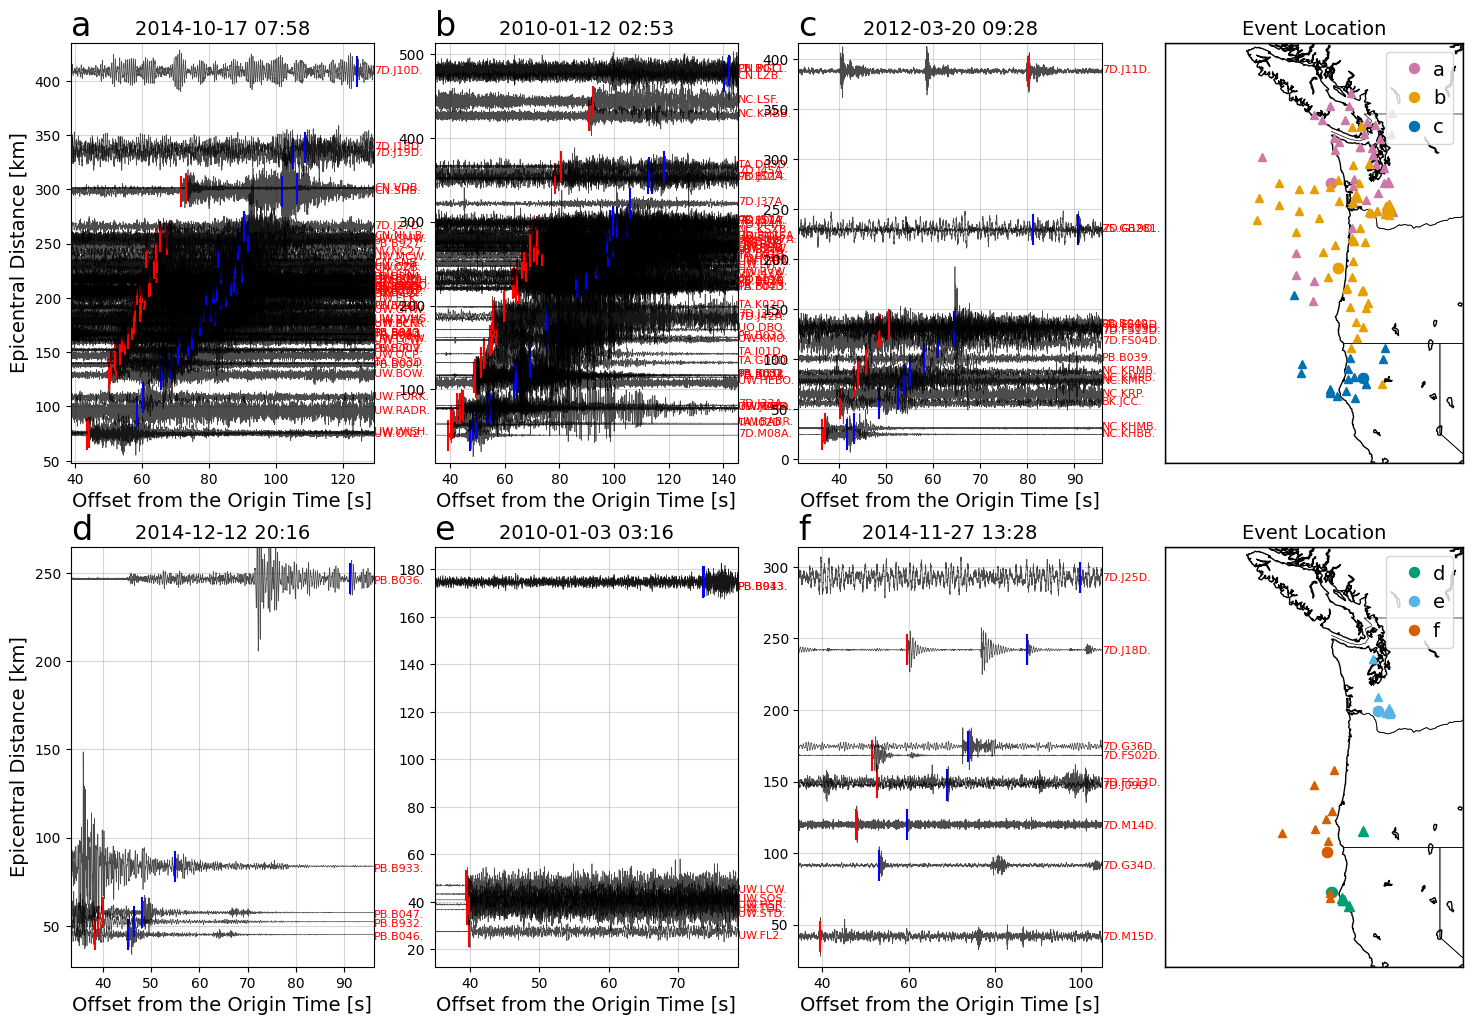

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(18, 12))
###################################################
event_idx = 52800
event_picks = picks[picks.idx==event_idx]
event_stations = event_picks.station.unique()
# print(event_picks)

otime = UTCDateTime(pd.to_datetime(event_picks.iloc[0].time))
olat = event_picks.iloc[0].latitude
olon = event_picks.iloc[0].longitude
odepth = event_picks.iloc[0].depth

tstring = otime.strftime('%Y%m%dT%H%M%SZ')
# path = dir + f"{tstring}.png"
# if os.path.exists(path):
#     print(f"File {path} already exists. Skipping.")
#     continue

bulk_sta = []
for sta in event_stations:
    network = sta.split('.')[0]
    station = sta.split('.')[1]
    loc = '*'
    ch = '?H?' 
    t1 = otime- pd.Timedelta(1,'days')
    t2 = otime + pd.Timedelta(1,'days')

    bulk_sta.append([network,station,loc,ch,t1,t2])
    
inv = client_iris.get_stations_bulk(bulk_sta)

distances = []
for network in inv:
    network_code = network.code
    for sta in network:
        station_code = sta.code
        slat = sta.latitude
        slon = sta.longitude
        selev = sta.elevation
        
        dis1 = locations2degrees(olat, olon, slat, slon)
        dist = degrees2kilometers(dis1)

        distances.append([network_code,station_code,olat,olon,odepth,slat,slon,selev,dist])
        
# Sort distances
distances = sorted(distances, key=lambda item: item[-1])
st = Stream()

starttime = otime - 30
endtime = otime + 200
ch = '?H?'
loc = '*'

# Set up to define the xlim and ylim
max_y = 0
min_y = 0
min_y_count = 0 

max_x = 0
min_x = 0
min_x_count= 0

bulk_ncedc = []
bulk_pnw = []

for item in distances:
    network_code, station_code, olat, olon, odepth, slat, slon, selev, dist = item

    # Make a bulk request for the waveforms
    if network_code in ['NC','BK']:
        bulk_ncedc.append([network_code,station_code,loc,ch,starttime,endtime])
    else:
        bulk_pnw.append([network_code,station_code,loc,ch,starttime,endtime])
    

    # Adjust the time window and scaling of the data
    station = network_code+'.'+station_code
    p_pick = event_picks.loc[(event_picks.station==station)&(event_picks.phase=='P')]
    s_pick = event_picks.loc[(event_picks.station==station)&(event_picks.phase=='S')]
    # Append p_pick and s_pick to distances
    item.extend([p_pick,s_pick])
    if len(p_pick)==0 and len(s_pick)==0:
        print('No picks for this station. Skipping.')
        continue

    if len(s_pick) > 0:
        if max_x < UTCDateTime(s_pick.iloc[0]['time_pick']) - starttime:
            max_x = UTCDateTime(s_pick.iloc[0]['time_pick']) + pd.Timedelta(seconds=5) - starttime
    elif len(p_pick) > 0:
        if max_x < UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime: 
            max_x = UTCDateTime(p_pick.iloc[0]['time_pick']) + pd.Timedelta(seconds=5)- starttime
    else:
        print('No picks for this station. Skipping.')
        continue 

    if len(p_pick) > 0:
        if min_x_count == 0:
            if min_x < UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime:
                min_x = UTCDateTime(p_pick.iloc[0]['time_pick']) -pd.Timedelta(seconds=5) - starttime
                min_x_count += 1           
        else:
            if min_x >= UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime:
                min_x = UTCDateTime(p_pick.iloc[0]['time_pick'])-pd.Timedelta(seconds=5) - starttime            
    elif len(s_pick) > 0:
        if min_x_count == 0:
            if min_x < UTCDateTime(s_pick.iloc[0]['time_pick'])- starttime:
                min_x = UTCDateTime(s_pick.iloc[0]['time_pick']) - pd.Timedelta(seconds=5)- starttime
                min_x_count += 1                
        else:
            if min_x >= UTCDateTime(s_pick.iloc[0]['time_pick'])- starttime:
                min_x = UTCDateTime(s_pick.iloc[0]['time_pick']) - pd.Timedelta(seconds=5) - starttime
    else:
        print('No picks for this station. Skipping.')
        continue    

    if min_y_count == 0:
        if min_y < dist:
            min_y = dist - 5
            min_y_count += 1           
    else:
        if min_y >= dist:
            min_y = dist - 5 

    max_y = dist + 5

    distances

scaling_factor = (1/2) * (max_y - min_y)
    
# Download the waveforms
st_ncedc = Stream()
st_pnw = Stream()
if len(bulk_ncedc) > 0:
    st_ncedc += client_ncedc.get_waveforms_bulk(bulk_ncedc)
if len(bulk_pnw) > 0:
    st_pnw += client_pnw.get_waveforms_bulk(bulk_pnw)

st = st_ncedc + st_pnw   

st = Stream(filter(lambda st: st.stats.sampling_rate > 10, st))
st.taper(max_percentage=0.05)
st.filter(type='bandpass', freqmin=2, freqmax=25)
st.merge(fill_value='interpolate')

# # Plot the waveforms
# # print('test1',st)
# fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot the event and station locations
m1 = Basemap(projection='merc', llcrnrlat=38, urcrnrlat=51, llcrnrlon=-132, urcrnrlon=-119, resolution='i', ax=axs[0,3])
m1.drawcoastlines()
m1.drawcountries()
m1.drawstates()
m1.drawmapboundary()
# m.drawparallels(np.arange(38, 51, 2), labels=[1, 0, 0, 0])
# m.drawmeridians(np.arange(-132, -119, 2), labels=[0, 0, 0, 1],rotation=45)
axs[0,3].set_title('Event Location',fontsize=14)
# # Count the number of stations that have 3 components
# count_1 = 0
# count_2 = 0
# count_3 = 0

for i,item in enumerate(distances):
    network_code, station_code, olat, olon, odepth, slat, slon, selev, dist,p_pick,s_pick = item
    st_sta = st.select(network=network_code,station=station_code)

    # Select only HH or BH channels
    _st = Stream()
    has_HH = bool(st_sta.select(channel="HHZ"))
    has_BH = bool(st_sta.select(channel="BHZ"))
    has_EH = bool(st_sta.select(channel="EHZ"))

    if has_HH:
        # If all HH, BH, EH, and EN channels are present, select only HH
        _st += st_sta.select(channel="HHZ")
    elif has_BH:
        # If BH, EH, and EN channels are present, select only BH
        _st += st_sta.select(channel="BHZ")
    elif has_EH:
        # If only EH and EN channels are present, select only EH
        # NTS: This may result in getting only vertical component data - EH? is used for PNSN analog stations
        # NTS: This may also be tricky for pulling full day-volumes because the sampling rate shifts for
        #      analog stations due to the remote digitization scheme used with analog stations
        _st += st_sta.select(channel="EHZ")
    else:
        continue
    
    # # Define the desired order of channels
    # desired_order = {
    #     'Z': ['HHZ', 'BHZ','EHZ'],
    #     'N': ['HHN', 'HH1', 'BHN', 'BH1', 'EHN', 'EN1'],
    #     'E': ['HHE', 'HH2', 'BHE', 'BH2', 'EHE', 'EN2'],
    # }

    # Function to map channels to their desired order
    # def get_channel_priority(channel):
    #     for priority, (key, values) in enumerate(desired_order.items()):
    #         if channel in values:
    #             return priority
    #     return float('inf')  # Return a high value for channels not in the desired order

    # # Sort the traces in trim_st based on the desired order
    # _st = sorted(_st, key=lambda trace: get_channel_priority(trace.stats.channel))

    _st = Stream(_st)
    # print(_st)
    # for ax in range(len(_st)):
    tr = _st[0]
    sampling_rate = tr.stats.sampling_rate
    channel = tr.stats.channel
    
    tr = tr.normalize()
    
    if len(p_pick) > 0:
        tp = UTCDateTime(p_pick.iloc[0]['time_pick']) - otime + 30
        i1 = int((tp-5) * sampling_rate)
        i2 = int((tp+15) * sampling_rate)
    elif len(s_pick) > 0:
        ts = UTCDateTime(s_pick.iloc[0]['time_pick']) - otime + 30
        i1 = int((ts-10) * sampling_rate)
        i2 = int((ts+10) * sampling_rate)
    else:
        print(f"WARNING: No pick time for {network}.{station}.{channel} on {otime}.")



    offsets1 = dist
    # print(offsets1)
    try: 
        wave = tr.data
        wave = wave / (np.nanmax(wave[i1:i2], axis=-1) * 10)
    except:
        continue 

    # Plot the waveform
    axs[0,0].plot(tr.times(), wave * scaling_factor + offsets1, 
                    color='black', alpha=0.7, lw=0.5)
    if len(p_pick) > 0:
        axs[0,0].vlines(UTCDateTime(p_pick.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/12) * scaling_factor, 
                        offsets1 + (1/12) * scaling_factor, color='r')
    if len(s_pick) > 0:
        axs[0,0].vlines(UTCDateTime(s_pick.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/12) * scaling_factor, 
                        offsets1 + (1/12) * scaling_factor, color='b')
    station = item[0]+'.'+item[1]+'.'
    offsets1 = item[-3]
    axs[0,0].text(max_x, offsets1-4, 
                    station, fontsize=8, color='red', verticalalignment='bottom')
    

    
    axs[0,0].set_ylim([min_y-(1/8) * scaling_factor, max_y+(1/8) * scaling_factor])
    axs[0,0].set_xlim([min_x, max_x])
    axs[0,0].grid(alpha=0.5)
    

    x_sta,y_sta = m1(slon,slat)
    m1.plot(x_sta, y_sta, '^', color='#CC79A7', markersize=6.2)

axs[0,0].set_xlabel('Offset from the Origin Time [s]',fontsize=14)
axs[0,0].set_ylabel('Epicentral Distance [km]',x=0.09,fontsize=14)
axs[0,0].text(min_x, max_y+(1/8) * scaling_factor, 
                'a', fontsize=24, color='black', verticalalignment='bottom')

# Update the title of the subplot with the shortened otime
formatted_otime = otime.strftime('%Y-%m-%d %H:%M')
axs[0,0].set_title(f"{formatted_otime}", fontsize=14)

# # # Plot the event location
x_event,y_event = m1(olon,olat)
m1.plot(x_event, y_event, 'o',color='#CC79A7', markersize=7.2)
m1.plot(x_event+180, y_event+180, 'o',color='#CC79A7', markersize=7.2,label='a')


###################################################
event_idx = 535
event_picks = picks[picks.idx==event_idx]
event_stations = event_picks.station.unique()
# print(event_picks)

otime = UTCDateTime(pd.to_datetime(event_picks.iloc[0].time))
olat = event_picks.iloc[0].latitude
olon = event_picks.iloc[0].longitude
odepth = event_picks.iloc[0].depth

tstring = otime.strftime('%Y%m%dT%H%M%SZ')
# path = dir + f"{tstring}.png"
# if os.path.exists(path):
#     print(f"File {path} already exists. Skipping.")
#     continue

bulk_sta = []
for sta in event_stations:
    network = sta.split('.')[0]
    station = sta.split('.')[1]
    loc = '*'
    ch = '?H?' 
    t1 = otime- pd.Timedelta(1,'days')
    t2 = otime + pd.Timedelta(1,'days')

    bulk_sta.append([network,station,loc,ch,t1,t2])
    
inv = client_iris.get_stations_bulk(bulk_sta)

distances = []
for network in inv:
    network_code = network.code
    for sta in network:
        station_code = sta.code
        slat = sta.latitude
        slon = sta.longitude
        selev = sta.elevation
        
        dis1 = locations2degrees(olat, olon, slat, slon)
        dist = degrees2kilometers(dis1)

        distances.append([network_code,station_code,olat,olon,odepth,slat,slon,selev,dist])
        
# Sort distances
distances = sorted(distances, key=lambda item: item[-1])
st = Stream()

starttime = otime - 30
endtime = otime + 200
ch = '?H?'
loc = '*'

# Set up to define the xlim and ylim
max_y = 0
min_y = 0
min_y_count = 0 

max_x = 0
min_x = 0
min_x_count= 0

bulk_ncedc = []
bulk_pnw = []

for item in distances:
    network_code, station_code, olat, olon, odepth, slat, slon, selev, dist = item

    # Make a bulk request for the waveforms
    if network_code in ['NC','BK']:
        bulk_ncedc.append([network_code,station_code,loc,ch,starttime,endtime])
    else:
        bulk_pnw.append([network_code,station_code,loc,ch,starttime,endtime])
    

    # Adjust the time window and scaling of the data
    station = network_code+'.'+station_code
    p_pick = event_picks.loc[(event_picks.station==station)&(event_picks.phase=='P')]
    s_pick = event_picks.loc[(event_picks.station==station)&(event_picks.phase=='S')]
    # Append p_pick and s_pick to distances
    item.extend([p_pick,s_pick])
    if len(p_pick)==0 and len(s_pick)==0:
        print('No picks for this station. Skipping.')
        continue

    if len(s_pick) > 0:
        if max_x < UTCDateTime(s_pick.iloc[0]['time_pick']) - starttime:
            max_x = UTCDateTime(s_pick.iloc[0]['time_pick']) + pd.Timedelta(seconds=5) - starttime
    elif len(p_pick) > 0:
        if max_x < UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime: 
            max_x = UTCDateTime(p_pick.iloc[0]['time_pick']) + pd.Timedelta(seconds=5)- starttime
    else:
        print('No picks for this station. Skipping.')
        continue 

    if len(p_pick) > 0:
        if min_x_count == 0:
            if min_x < UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime:
                min_x = UTCDateTime(p_pick.iloc[0]['time_pick']) -pd.Timedelta(seconds=5) - starttime
                min_x_count += 1           
        else:
            if min_x >= UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime:
                min_x = UTCDateTime(p_pick.iloc[0]['time_pick'])-pd.Timedelta(seconds=5) - starttime            
    elif len(s_pick) > 0:
        if min_x_count == 0:
            if min_x < UTCDateTime(s_pick.iloc[0]['time_pick'])- starttime:
                min_x = UTCDateTime(s_pick.iloc[0]['time_pick']) - pd.Timedelta(seconds=5)- starttime
                min_x_count += 1                
        else:
            if min_x >= UTCDateTime(s_pick.iloc[0]['time_pick'])- starttime:
                min_x = UTCDateTime(s_pick.iloc[0]['time_pick']) - pd.Timedelta(seconds=5) - starttime
    else:
        print('No picks for this station. Skipping.')
        continue    

    if min_y_count == 0:
        if min_y < dist:
            min_y = dist - 5
            min_y_count += 1           
    else:
        if min_y >= dist:
            min_y = dist - 5 

    max_y = dist + 5

    distances

scaling_factor = (1/2) * (max_y - min_y)
    
# Download the waveforms
st_ncedc = Stream()
st_pnw = Stream()
if len(bulk_ncedc) > 0:
    st_ncedc += client_ncedc.get_waveforms_bulk(bulk_ncedc)
if len(bulk_pnw) > 0:
    st_pnw += client_pnw.get_waveforms_bulk(bulk_pnw)

st = st_ncedc + st_pnw   

st = Stream(filter(lambda st: st.stats.sampling_rate > 10, st))
st.taper(max_percentage=0.05)
st.filter(type='bandpass', freqmin=2, freqmax=25)
st.merge(fill_value='interpolate')

# Plot the event and station locations
m2 = Basemap(projection='merc', llcrnrlat=38, urcrnrlat=51, llcrnrlon=-132, urcrnrlon=-119, resolution='i', ax=axs[1,3])
m2.drawcoastlines()
m2.drawcountries()
m2.drawstates()
m2.drawmapboundary()
# m.drawparallels(np.arange(38, 51, 2), labels=[1, 0, 0, 0])
# m.drawmeridians(np.arange(-132, -119, 2), labels=[0, 0, 0, 1],rotation=45)
axs[1,3].set_title('Event Location',fontsize=14)

# # Plot the waveforms
# # print('test1',st)
# fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i,item in enumerate(distances):
    network_code, station_code, olat, olon, odepth, slat, slon, selev, dist,p_pick,s_pick = item
    st_sta = st.select(network=network_code,station=station_code)

    # Select only HH or BH channels
    _st = Stream()
    has_HH = bool(st_sta.select(channel="HHZ"))
    has_BH = bool(st_sta.select(channel="BHZ"))
    has_EH = bool(st_sta.select(channel="EHZ"))

    if has_HH:
        # If all HH, BH, EH, and EN channels are present, select only HH
        _st += st_sta.select(channel="HHZ")
    elif has_BH:
        # If BH, EH, and EN channels are present, select only BH
        _st += st_sta.select(channel="BHZ")
    elif has_EH:
        # If only EH and EN channels are present, select only EH
        # NTS: This may result in getting only vertical component data - EH? is used for PNSN analog stations
        # NTS: This may also be tricky for pulling full day-volumes because the sampling rate shifts for
        #      analog stations due to the remote digitization scheme used with analog stations
        _st += st_sta.select(channel="EHZ")
    else:
        continue
    
    # # Define the desired order of channels
    # desired_order = {
    #     'Z': ['HHZ', 'BHZ','EHZ'],
    #     'N': ['HHN', 'HH1', 'BHN', 'BH1', 'EHN', 'EN1'],
    #     'E': ['HHE', 'HH2', 'BHE', 'BH2', 'EHE', 'EN2'],
    # }

    # Function to map channels to their desired order
    # def get_channel_priority(channel):
    #     for priority, (key, values) in enumerate(desired_order.items()):
    #         if channel in values:
    #             return priority
    #     return float('inf')  # Return a high value for channels not in the desired order

    # # Sort the traces in trim_st based on the desired order
    # _st = sorted(_st, key=lambda trace: get_channel_priority(trace.stats.channel))

    _st = Stream(_st)
    # print(_st)
    # for ax in range(len(_st)):
    tr = _st[0]
    sampling_rate = tr.stats.sampling_rate
    channel = tr.stats.channel
    
    tr = tr.normalize()
    
    if len(p_pick) > 0:
        tp = UTCDateTime(p_pick.iloc[0]['time_pick']) - otime + 30
        i1 = int((tp-5) * sampling_rate)
        i2 = int((tp+15) * sampling_rate)
    elif len(s_pick) > 0:
        ts = UTCDateTime(s_pick.iloc[0]['time_pick']) - otime + 30
        i1 = int((ts-10) * sampling_rate)
        i2 = int((ts+10) * sampling_rate)
    else:
        print(f"WARNING: No pick time for {network}.{station}.{channel} on {otime}.")



    offsets1 = dist
    # print(offsets1)
    try: 
        wave = tr.data
        wave = wave / (np.nanmax(wave[i1:i2], axis=-1) * 10)
    except:
        continue 

    # Plot the waveform
    axs[1,0].plot(tr.times(), wave * scaling_factor + offsets1, 
                    color='black', alpha=0.7, lw=0.5)
    if len(p_pick) > 0:
        axs[1,0].vlines(UTCDateTime(p_pick.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/12) * scaling_factor, 
                        offsets1 + (1/12) * scaling_factor, color='r')
    if len(s_pick) > 0:
        axs[1,0].vlines(UTCDateTime(s_pick.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/12) * scaling_factor, 
                        offsets1 + (1/12) * scaling_factor, color='b')
    station = item[0]+'.'+item[1]+'.'
    offsets1 = item[-3]
    axs[1,0].text(max_x, offsets1-4, 
                    station, fontsize=8, color='red', verticalalignment='bottom')
    

    
    axs[1,0].set_ylim([min_y-(1/8) * scaling_factor, max_y+(1/8) * scaling_factor])
    axs[1,0].set_xlim([min_x, max_x])
    axs[1,0].grid(alpha=0.5)
    
    

    x_sta,y_sta = m1(slon,slat)
    m2.plot(x_sta, y_sta, '^', color='#009E73', markersize=6.5)
axs[1,0].set_xlabel('Offset from the Origin Time [s]',fontsize=14)
axs[1,0].set_ylabel('Epicentral Distance [km]',x=0.09,fontsize=14)
axs[1,0].text(min_x, max_y+(1/8) * scaling_factor, 
                'd', fontsize=24, color='black', verticalalignment='bottom')

# Update the title of the subplot with the shortened otime
formatted_otime = otime.strftime('%Y-%m-%d %H:%M')
axs[0,1].set_title(f"{formatted_otime}", fontsize=14)

# # # Plot the event location
x_event,y_event = m1(olon,olat)
m2.plot(x_event, y_event, 'o',color='#009E73', markersize=7.2)
m2.plot(x_event+180, y_event+180, 'o',color='#009E73', markersize=7.2,label='d')

###################################################
event_idx = 20052
event_picks = picks[picks.idx==event_idx]
event_stations = event_picks.station.unique()
# print(event_picks)

otime = UTCDateTime(pd.to_datetime(event_picks.iloc[0].time))
olat = event_picks.iloc[0].latitude
olon = event_picks.iloc[0].longitude
odepth = event_picks.iloc[0].depth

tstring = otime.strftime('%Y%m%dT%H%M%SZ')
# path = dir + f"{tstring}.png"
# if os.path.exists(path):
#     print(f"File {path} already exists. Skipping.")
#     continue

bulk_sta = []
for sta in event_stations:
    network = sta.split('.')[0]
    station = sta.split('.')[1]
    loc = '*'
    ch = '?H?' 
    t1 = otime- pd.Timedelta(1,'days')
    t2 = otime + pd.Timedelta(1,'days')

    bulk_sta.append([network,station,loc,ch,t1,t2])
    
inv = client_iris.get_stations_bulk(bulk_sta)

distances = []
for network in inv:
    network_code = network.code
    for sta in network:
        station_code = sta.code
        slat = sta.latitude
        slon = sta.longitude
        selev = sta.elevation
        
        dis1 = locations2degrees(olat, olon, slat, slon)
        dist = degrees2kilometers(dis1)

        distances.append([network_code,station_code,olat,olon,odepth,slat,slon,selev,dist])
        
# Sort distances
distances = sorted(distances, key=lambda item: item[-1])
st = Stream()

starttime = otime - 30
endtime = otime + 200
ch = '?H?'
loc = '*'

# Set up to define the xlim and ylim
max_y = 0
min_y = 0
min_y_count = 0 

max_x = 0
min_x = 0
min_x_count= 0

bulk_ncedc = []
bulk_pnw = []

for item in distances:
    network_code, station_code, olat, olon, odepth, slat, slon, selev, dist = item

    # Make a bulk request for the waveforms
    if network_code in ['NC','BK']:
        bulk_ncedc.append([network_code,station_code,loc,ch,starttime,endtime])
    else:
        bulk_pnw.append([network_code,station_code,loc,ch,starttime,endtime])
    

    # Adjust the time window and scaling of the data
    station = network_code+'.'+station_code
    p_pick = event_picks.loc[(event_picks.station==station)&(event_picks.phase=='P')]
    s_pick = event_picks.loc[(event_picks.station==station)&(event_picks.phase=='S')]
    # Append p_pick and s_pick to distances
    item.extend([p_pick,s_pick])
    if len(p_pick)==0 and len(s_pick)==0:
        print('No picks for this station. Skipping.')
        continue

    if len(s_pick) > 0:
        if max_x < UTCDateTime(s_pick.iloc[0]['time_pick']) - starttime:
            max_x = UTCDateTime(s_pick.iloc[0]['time_pick']) + pd.Timedelta(seconds=5) - starttime
    elif len(p_pick) > 0:
        if max_x < UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime: 
            max_x = UTCDateTime(p_pick.iloc[0]['time_pick']) + pd.Timedelta(seconds=5)- starttime
    else:
        print('No picks for this station. Skipping.')
        continue 

    if len(p_pick) > 0:
        if min_x_count == 0:
            if min_x < UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime:
                min_x = UTCDateTime(p_pick.iloc[0]['time_pick']) -pd.Timedelta(seconds=5) - starttime
                min_x_count += 1           
        else:
            if min_x >= UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime:
                min_x = UTCDateTime(p_pick.iloc[0]['time_pick'])-pd.Timedelta(seconds=5) - starttime            
    elif len(s_pick) > 0:
        if min_x_count == 0:
            if min_x < UTCDateTime(s_pick.iloc[0]['time_pick'])- starttime:
                min_x = UTCDateTime(s_pick.iloc[0]['time_pick']) - pd.Timedelta(seconds=5)- starttime
                min_x_count += 1                
        else:
            if min_x >= UTCDateTime(s_pick.iloc[0]['time_pick'])- starttime:
                min_x = UTCDateTime(s_pick.iloc[0]['time_pick']) - pd.Timedelta(seconds=5) - starttime
    else:
        print('No picks for this station. Skipping.')
        continue    

    if min_y_count == 0:
        if min_y < dist:
            min_y = dist - 5
            min_y_count += 1           
    else:
        if min_y >= dist:
            min_y = dist - 5 

    max_y = dist + 5

    distances

scaling_factor = (1/2) * (max_y - min_y)
    
# Download the waveforms
st_ncedc = Stream()
st_pnw = Stream()
if len(bulk_ncedc) > 0:
    st_ncedc += client_ncedc.get_waveforms_bulk(bulk_ncedc)
if len(bulk_pnw) > 0:
    st_pnw += client_pnw.get_waveforms_bulk(bulk_pnw)

st = st_ncedc + st_pnw   

st = Stream(filter(lambda st: st.stats.sampling_rate > 10, st))
st.taper(max_percentage=0.05)
st.filter(type='bandpass', freqmin=2, freqmax=25)
st.merge(fill_value='interpolate')

# # Plot the waveforms
# # print('test1',st)
# fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i,item in enumerate(distances):
    network_code, station_code, olat, olon, odepth, slat, slon, selev, dist,p_pick,s_pick = item
    st_sta = st.select(network=network_code,station=station_code)

    # Select only HH or BH channels
    _st = Stream()
    has_HH = bool(st_sta.select(channel="HHZ"))
    has_BH = bool(st_sta.select(channel="BHZ"))
    has_EH = bool(st_sta.select(channel="EHZ"))

    if has_HH:
        # If all HH, BH, EH, and EN channels are present, select only HH
        _st += st_sta.select(channel="HHZ")
    elif has_BH:
        # If BH, EH, and EN channels are present, select only BH
        _st += st_sta.select(channel="BHZ")
    elif has_EH:
        # If only EH and EN channels are present, select only EH
        # NTS: This may result in getting only vertical component data - EH? is used for PNSN analog stations
        # NTS: This may also be tricky for pulling full day-volumes because the sampling rate shifts for
        #      analog stations due to the remote digitization scheme used with analog stations
        _st += st_sta.select(channel="EHZ")
    else:
        continue
    
    # # Define the desired order of channels
    # desired_order = {
    #     'Z': ['HHZ', 'BHZ','EHZ'],
    #     'N': ['HHN', 'HH1', 'BHN', 'BH1', 'EHN', 'EN1'],
    #     'E': ['HHE', 'HH2', 'BHE', 'BH2', 'EHE', 'EN2'],
    # }

    # Function to map channels to their desired order
    # def get_channel_priority(channel):
    #     for priority, (key, values) in enumerate(desired_order.items()):
    #         if channel in values:
    #             return priority
    #     return float('inf')  # Return a high value for channels not in the desired order

    # # Sort the traces in trim_st based on the desired order
    # _st = sorted(_st, key=lambda trace: get_channel_priority(trace.stats.channel))

    _st = Stream(_st)
    # print(_st)
    # for ax in range(len(_st)):
    tr = _st[0]
    sampling_rate = tr.stats.sampling_rate
    channel = tr.stats.channel
    
    tr = tr.normalize()
    
    if len(p_pick) > 0:
        tp = UTCDateTime(p_pick.iloc[0]['time_pick']) - otime + 30
        i1 = int((tp-5) * sampling_rate)
        i2 = int((tp+15) * sampling_rate)
    elif len(s_pick) > 0:
        ts = UTCDateTime(s_pick.iloc[0]['time_pick']) - otime + 30
        i1 = int((ts-10) * sampling_rate)
        i2 = int((ts+10) * sampling_rate)
    else:
        print(f"WARNING: No pick time for {network}.{station}.{channel} on {otime}.")



    offsets1 = dist
    # print(offsets1)
    try: 
        wave = tr.data
        wave = wave / (np.nanmax(wave[i1:i2], axis=-1) * 10)
    except:
        continue 

    # Plot the waveform
    axs[0,1].plot(tr.times(), wave * scaling_factor + offsets1, 
                    color='black', alpha=0.7, lw=0.5)
    if len(p_pick) > 0:
        axs[0,1].vlines(UTCDateTime(p_pick.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/12) * scaling_factor, 
                        offsets1 + (1/12) * scaling_factor, color='r')
    if len(s_pick) > 0:
        axs[0,1].vlines(UTCDateTime(s_pick.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/12) * scaling_factor, 
                        offsets1 + (1/12) * scaling_factor, color='b')
    station = item[0]+'.'+item[1]+'.'
    offsets1 = item[-3]
    axs[0,1].text(max_x, offsets1-4, 
                    station, fontsize=8, color='red', verticalalignment='bottom')
    

    
    axs[0,1].set_ylim([min_y-(1/8) * scaling_factor, max_y+(1/8) * scaling_factor])
    axs[0,1].set_xlim([min_x, max_x])
    axs[0,1].grid(alpha=0.5)
    
    

    x_sta,y_sta = m1(slon,slat)
    m1.plot(x_sta, y_sta, '^', color='#E69F00', markersize=6.2)
axs[0,1].set_xlabel('Offset from the Origin Time [s]',fontsize=14)
# axs[1,0].set_ylabel('Epicentral Distance [km]',x=0.09,fontsize=14)
axs[0,1].text(min_x, max_y+(1/8) * scaling_factor, 
                'b', fontsize=24, color='black', verticalalignment='bottom')

# Update the title of the subplot with the shortened otime
formatted_otime = otime.strftime('%Y-%m-%d %H:%M')
axs[0,2].set_title(f"{formatted_otime}", fontsize=14)

# # # Plot the event location
x_event,y_event = m1(olon,olat)
m1.plot(x_event, y_event, 'o',color='#E69F00', markersize=7.2)
m1.plot(x_event+180, y_event+180, 'o',color='#E69F00', markersize=7.2,label='b')

###################################################
event_idx = 55331
event_picks = picks[picks.idx==event_idx]
event_stations = event_picks.station.unique()
# print(event_picks)

otime = UTCDateTime(pd.to_datetime(event_picks.iloc[0].time))
olat = event_picks.iloc[0].latitude
olon = event_picks.iloc[0].longitude
odepth = event_picks.iloc[0].depth

tstring = otime.strftime('%Y%m%dT%H%M%SZ')
# path = dir + f"{tstring}.png"
# if os.path.exists(path):
#     print(f"File {path} already exists. Skipping.")
#     continue

bulk_sta = []
for sta in event_stations:
    network = sta.split('.')[0]
    station = sta.split('.')[1]
    loc = '*'
    ch = '?H?' 
    t1 = otime- pd.Timedelta(1,'days')
    t2 = otime + pd.Timedelta(1,'days')

    bulk_sta.append([network,station,loc,ch,t1,t2])
    
inv = client_iris.get_stations_bulk(bulk_sta)

distances = []
for network in inv:
    network_code = network.code
    for sta in network:
        station_code = sta.code
        slat = sta.latitude
        slon = sta.longitude
        selev = sta.elevation
        
        dis1 = locations2degrees(olat, olon, slat, slon)
        dist = degrees2kilometers(dis1)

        distances.append([network_code,station_code,olat,olon,odepth,slat,slon,selev,dist])
        
# Sort distances
distances = sorted(distances, key=lambda item: item[-1])
st = Stream()

starttime = otime - 30
endtime = otime + 200
ch = '?H?'
loc = '*'

# Set up to define the xlim and ylim
max_y = 0
min_y = 0
min_y_count = 0 

max_x = 0
min_x = 0
min_x_count= 0

bulk_ncedc = []
bulk_pnw = []

for item in distances:
    network_code, station_code, olat, olon, odepth, slat, slon, selev, dist = item

    # Make a bulk request for the waveforms
    if network_code in ['NC','BK']:
        bulk_ncedc.append([network_code,station_code,loc,ch,starttime,endtime])
    else:
        bulk_pnw.append([network_code,station_code,loc,ch,starttime,endtime])
    

    # Adjust the time window and scaling of the data
    station = network_code+'.'+station_code
    p_pick = event_picks.loc[(event_picks.station==station)&(event_picks.phase=='P')]
    s_pick = event_picks.loc[(event_picks.station==station)&(event_picks.phase=='S')]
    # Append p_pick and s_pick to distances
    item.extend([p_pick,s_pick])
    if len(p_pick)==0 and len(s_pick)==0:
        print('No picks for this station. Skipping.')
        continue

    if len(s_pick) > 0:
        if max_x < UTCDateTime(s_pick.iloc[0]['time_pick']) - starttime:
            max_x = UTCDateTime(s_pick.iloc[0]['time_pick']) + pd.Timedelta(seconds=5) - starttime
    elif len(p_pick) > 0:
        if max_x < UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime: 
            max_x = UTCDateTime(p_pick.iloc[0]['time_pick']) + pd.Timedelta(seconds=5)- starttime
    else:
        print('No picks for this station. Skipping.')
        continue 

    if len(p_pick) > 0:
        if min_x_count == 0:
            if min_x < UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime:
                min_x = UTCDateTime(p_pick.iloc[0]['time_pick']) -pd.Timedelta(seconds=5) - starttime
                min_x_count += 1           
        else:
            if min_x >= UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime:
                min_x = UTCDateTime(p_pick.iloc[0]['time_pick'])-pd.Timedelta(seconds=5) - starttime            
    elif len(s_pick) > 0:
        if min_x_count == 0:
            if min_x < UTCDateTime(s_pick.iloc[0]['time_pick'])- starttime:
                min_x = UTCDateTime(s_pick.iloc[0]['time_pick']) - pd.Timedelta(seconds=5)- starttime
                min_x_count += 1                
        else:
            if min_x >= UTCDateTime(s_pick.iloc[0]['time_pick'])- starttime:
                min_x = UTCDateTime(s_pick.iloc[0]['time_pick']) - pd.Timedelta(seconds=5) - starttime
    else:
        print('No picks for this station. Skipping.')
        continue    

    if min_y_count == 0:
        if min_y < dist:
            min_y = dist - 5
            min_y_count += 1           
    else:
        if min_y >= dist:
            min_y = dist - 5 

    max_y = dist + 5

    distances

scaling_factor = (1/2) * (max_y - min_y)
    
# Download the waveforms
st_ncedc = Stream()
st_pnw = Stream()
if len(bulk_ncedc) > 0:
    st_ncedc += client_ncedc.get_waveforms_bulk(bulk_ncedc)
if len(bulk_pnw) > 0:
    st_pnw += client_pnw.get_waveforms_bulk(bulk_pnw)

st = st_ncedc + st_pnw   

st = Stream(filter(lambda st: st.stats.sampling_rate > 10, st))
st.taper(max_percentage=0.05)
st.filter(type='bandpass', freqmin=2, freqmax=25)
st.merge(fill_value='interpolate')

# # Plot the waveforms
# # print('test1',st)
# fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i,item in enumerate(distances):
    network_code, station_code, olat, olon, odepth, slat, slon, selev, dist,p_pick,s_pick = item
    st_sta = st.select(network=network_code,station=station_code)

    # Select only HH or BH channels
    _st = Stream()
    has_HH = bool(st_sta.select(channel="HHZ"))
    has_BH = bool(st_sta.select(channel="BHZ"))
    has_EH = bool(st_sta.select(channel="EHZ"))

    if has_HH:
        # If all HH, BH, EH, and EN channels are present, select only HH
        _st += st_sta.select(channel="HHZ")
    elif has_BH:
        # If BH, EH, and EN channels are present, select only BH
        _st += st_sta.select(channel="BHZ")
    elif has_EH:
        # If only EH and EN channels are present, select only EH
        # NTS: This may result in getting only vertical component data - EH? is used for PNSN analog stations
        # NTS: This may also be tricky for pulling full day-volumes because the sampling rate shifts for
        #      analog stations due to the remote digitization scheme used with analog stations
        _st += st_sta.select(channel="EHZ")
    else:
        continue
    
    # # Define the desired order of channels
    # desired_order = {
    #     'Z': ['HHZ', 'BHZ','EHZ'],
    #     'N': ['HHN', 'HH1', 'BHN', 'BH1', 'EHN', 'EN1'],
    #     'E': ['HHE', 'HH2', 'BHE', 'BH2', 'EHE', 'EN2'],
    # }

    # Function to map channels to their desired order
    # def get_channel_priority(channel):
    #     for priority, (key, values) in enumerate(desired_order.items()):
    #         if channel in values:
    #             return priority
    #     return float('inf')  # Return a high value for channels not in the desired order

    # # Sort the traces in trim_st based on the desired order
    # _st = sorted(_st, key=lambda trace: get_channel_priority(trace.stats.channel))

    _st = Stream(_st)
    # print(_st)
    # for ax in range(len(_st)):
    tr = _st[0]
    sampling_rate = tr.stats.sampling_rate
    channel = tr.stats.channel
    
    tr = tr.normalize()
    
    if len(p_pick) > 0:
        tp = UTCDateTime(p_pick.iloc[0]['time_pick']) - otime + 30
        i1 = int((tp-5) * sampling_rate)
        i2 = int((tp+15) * sampling_rate)
    elif len(s_pick) > 0:
        ts = UTCDateTime(s_pick.iloc[0]['time_pick']) - otime + 30
        i1 = int((ts-10) * sampling_rate)
        i2 = int((ts+10) * sampling_rate)
    else:
        print(f"WARNING: No pick time for {network}.{station}.{channel} on {otime}.")



    offsets1 = dist
    # print(offsets1)
    try: 
        wave = tr.data
        wave = wave / (np.nanmax(wave[i1:i2], axis=-1) * 10)
    except:
        continue 

    # Plot the waveform
    axs[0,2].plot(tr.times(), wave * scaling_factor + offsets1, 
                    color='black', alpha=0.7, lw=0.5)
    if len(p_pick) > 0:
        axs[0,2].vlines(UTCDateTime(p_pick.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/12) * scaling_factor, 
                        offsets1 + (1/12) * scaling_factor, color='r')
    if len(s_pick) > 0:
        axs[0,2].vlines(UTCDateTime(s_pick.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/12) * scaling_factor, 
                        offsets1 + (1/12) * scaling_factor, color='b')
    station = item[0]+'.'+item[1]+'.'
    offsets1 = item[-3]
    axs[0,2].text(max_x, offsets1-4, 
                    station, fontsize=8, color='red', verticalalignment='bottom')
    

    
    axs[0,2].set_ylim([min_y-(1/8) * scaling_factor, max_y+(1/8) * scaling_factor])
    axs[0,2].set_xlim([min_x, max_x])
    axs[0,2].grid(alpha=0.5)
    
    

    x_sta,y_sta = m1(slon,slat)
    m1.plot(x_sta, y_sta, '^', color='#0072B2', markersize=6.2)
axs[0,2].set_xlabel('Offset from the Origin Time [s]',fontsize=14)
# axs[1,0].set_ylabel('Epicentral Distance [km]',x=0.09,fontsize=14)
axs[0,2].text(min_x, max_y+(1/8) * scaling_factor, 
                'c', fontsize=24, color='black', verticalalignment='bottom')
# Update the title of the subplot with the shortened otime
formatted_otime = otime.strftime('%Y-%m-%d %H:%M')
axs[1,0].set_title(f"{formatted_otime}", fontsize=14)


# # # Plot the event location
x_event,y_event = m1(olon,olat)
m1.plot(x_event, y_event, 'o',color='#0072B2', markersize=7.2)
m1.plot(x_event+180, y_event+180, 'o',color='#0072B2', markersize=7.2,label='c')

###################################################
event_idx = 29
event_picks = picks[picks.idx==event_idx]
event_stations = event_picks.station.unique()
# print(event_picks)

otime = UTCDateTime(pd.to_datetime(event_picks.iloc[0].time))
olat = event_picks.iloc[0].latitude
olon = event_picks.iloc[0].longitude
odepth = event_picks.iloc[0].depth

tstring = otime.strftime('%Y%m%dT%H%M%SZ')
# path = dir + f"{tstring}.png"
# if os.path.exists(path):
#     print(f"File {path} already exists. Skipping.")
#     continue

bulk_sta = []
for sta in event_stations:
    network = sta.split('.')[0]
    station = sta.split('.')[1]
    loc = '*'
    ch = '?H?' 
    t1 = otime- pd.Timedelta(1,'days')
    t2 = otime + pd.Timedelta(1,'days')

    bulk_sta.append([network,station,loc,ch,t1,t2])
    
inv = client_iris.get_stations_bulk(bulk_sta)

distances = []
for network in inv:
    network_code = network.code
    for sta in network:
        station_code = sta.code
        slat = sta.latitude
        slon = sta.longitude
        selev = sta.elevation
        
        dis1 = locations2degrees(olat, olon, slat, slon)
        dist = degrees2kilometers(dis1)

        distances.append([network_code,station_code,olat,olon,odepth,slat,slon,selev,dist])
        
# Sort distances
distances = sorted(distances, key=lambda item: item[-1])
st = Stream()

starttime = otime - 30
endtime = otime + 200
ch = '?H?'
loc = '*'

# Set up to define the xlim and ylim
max_y = 0
min_y = 0
min_y_count = 0 

max_x = 0
min_x = 0
min_x_count= 0

bulk_ncedc = []
bulk_pnw = []

for item in distances:
    network_code, station_code, olat, olon, odepth, slat, slon, selev, dist = item

    # Make a bulk request for the waveforms
    if network_code in ['NC','BK']:
        bulk_ncedc.append([network_code,station_code,loc,ch,starttime,endtime])
    else:
        bulk_pnw.append([network_code,station_code,loc,ch,starttime,endtime])
    

    # Adjust the time window and scaling of the data
    station = network_code+'.'+station_code
    p_pick = event_picks.loc[(event_picks.station==station)&(event_picks.phase=='P')]
    s_pick = event_picks.loc[(event_picks.station==station)&(event_picks.phase=='S')]
    # Append p_pick and s_pick to distances
    item.extend([p_pick,s_pick])
    if len(p_pick)==0 and len(s_pick)==0:
        print('No picks for this station. Skipping.')
        continue

    if len(s_pick) > 0:
        if max_x < UTCDateTime(s_pick.iloc[0]['time_pick']) - starttime:
            max_x = UTCDateTime(s_pick.iloc[0]['time_pick']) + pd.Timedelta(seconds=5) - starttime
    elif len(p_pick) > 0:
        if max_x < UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime: 
            max_x = UTCDateTime(p_pick.iloc[0]['time_pick']) + pd.Timedelta(seconds=5)- starttime
    else:
        print('No picks for this station. Skipping.')
        continue 

    if len(p_pick) > 0:
        if min_x_count == 0:
            if min_x < UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime:
                min_x = UTCDateTime(p_pick.iloc[0]['time_pick']) -pd.Timedelta(seconds=5) - starttime
                min_x_count += 1           
        else:
            if min_x >= UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime:
                min_x = UTCDateTime(p_pick.iloc[0]['time_pick'])-pd.Timedelta(seconds=5) - starttime            
    elif len(s_pick) > 0:
        if min_x_count == 0:
            if min_x < UTCDateTime(s_pick.iloc[0]['time_pick'])- starttime:
                min_x = UTCDateTime(s_pick.iloc[0]['time_pick']) - pd.Timedelta(seconds=5)- starttime
                min_x_count += 1                
        else:
            if min_x >= UTCDateTime(s_pick.iloc[0]['time_pick'])- starttime:
                min_x = UTCDateTime(s_pick.iloc[0]['time_pick']) - pd.Timedelta(seconds=5) - starttime
    else:
        print('No picks for this station. Skipping.')
        continue    

    if min_y_count == 0:
        if min_y < dist:
            min_y = dist - 5
            min_y_count += 1           
    else:
        if min_y >= dist:
            min_y = dist - 5 

    max_y = dist + 5

    distances

scaling_factor = (1/2) * (max_y - min_y)
    
# Download the waveforms
st_ncedc = Stream()
st_pnw = Stream()
if len(bulk_ncedc) > 0:
    st_ncedc += client_ncedc.get_waveforms_bulk(bulk_ncedc)
if len(bulk_pnw) > 0:
    st_pnw += client_pnw.get_waveforms_bulk(bulk_pnw)

st = st_ncedc + st_pnw   

st = Stream(filter(lambda st: st.stats.sampling_rate > 10, st))
st.taper(max_percentage=0.05)
st.filter(type='bandpass', freqmin=2, freqmax=25)
st.merge(fill_value='interpolate')

# # Plot the waveforms
# # print('test1',st)
# fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i,item in enumerate(distances):
    network_code, station_code, olat, olon, odepth, slat, slon, selev, dist,p_pick,s_pick = item
    st_sta = st.select(network=network_code,station=station_code)

    # Select only HH or BH channels
    _st = Stream()
    has_HH = bool(st_sta.select(channel="HHZ"))
    has_BH = bool(st_sta.select(channel="BHZ"))
    has_EH = bool(st_sta.select(channel="EHZ"))

    if has_HH:
        # If all HH, BH, EH, and EN channels are present, select only HH
        _st += st_sta.select(channel="HHZ")
    elif has_BH:
        # If BH, EH, and EN channels are present, select only BH
        _st += st_sta.select(channel="BHZ")
    elif has_EH:
        # If only EH and EN channels are present, select only EH
        # NTS: This may result in getting only vertical component data - EH? is used for PNSN analog stations
        # NTS: This may also be tricky for pulling full day-volumes because the sampling rate shifts for
        #      analog stations due to the remote digitization scheme used with analog stations
        _st += st_sta.select(channel="EHZ")
    else:
        continue
    
    # # Define the desired order of channels
    # desired_order = {
    #     'Z': ['HHZ', 'BHZ','EHZ'],
    #     'N': ['HHN', 'HH1', 'BHN', 'BH1', 'EHN', 'EN1'],
    #     'E': ['HHE', 'HH2', 'BHE', 'BH2', 'EHE', 'EN2'],
    # }

    # Function to map channels to their desired order
    # def get_channel_priority(channel):
    #     for priority, (key, values) in enumerate(desired_order.items()):
    #         if channel in values:
    #             return priority
    #     return float('inf')  # Return a high value for channels not in the desired order

    # # Sort the traces in trim_st based on the desired order
    # _st = sorted(_st, key=lambda trace: get_channel_priority(trace.stats.channel))

    _st = Stream(_st)
    # print(_st)
    # for ax in range(len(_st)):
    tr = _st[0]
    sampling_rate = tr.stats.sampling_rate
    channel = tr.stats.channel
    
    tr = tr.normalize()
    
    if len(p_pick) > 0:
        tp = UTCDateTime(p_pick.iloc[0]['time_pick']) - otime + 30
        i1 = int((tp-5) * sampling_rate)
        i2 = int((tp+15) * sampling_rate)
    elif len(s_pick) > 0:
        ts = UTCDateTime(s_pick.iloc[0]['time_pick']) - otime + 30
        i1 = int((ts-10) * sampling_rate)
        i2 = int((ts+10) * sampling_rate)
    else:
        print(f"WARNING: No pick time for {network}.{station}.{channel} on {otime}.")



    offsets1 = dist
    # print(offsets1)
    try: 
        wave = tr.data
        wave = wave / (np.nanmax(wave[i1:i2], axis=-1) * 10)
    except:
        continue 

    # Plot the waveform
    axs[1,1].plot(tr.times(), wave * scaling_factor + offsets1, 
                    color='black', alpha=0.7, lw=0.5)
    if len(p_pick) > 0:
        axs[1,1].vlines(UTCDateTime(p_pick.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/12) * scaling_factor, 
                        offsets1 + (1/12) * scaling_factor, color='r')
    if len(s_pick) > 0:
        axs[1,1].vlines(UTCDateTime(s_pick.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/12) * scaling_factor, 
                        offsets1 + (1/12) * scaling_factor, color='b')
    station = item[0]+'.'+item[1]+'.'
    offsets1 = item[-3]
    axs[1,1].text(max_x, offsets1-4, 
                    station, fontsize=8, color='red', verticalalignment='bottom')
    

    
    axs[1,1].set_ylim([min_y-(1/8) * scaling_factor, max_y+(1/8) * scaling_factor])
    axs[1,1].set_xlim([min_x, max_x])
    axs[1,1].grid(alpha=0.5)
    
    

    x_sta,y_sta = m1(slon,slat)
    m2.plot(x_sta, y_sta, '^', color='#56B4E9', markersize=6.2)
axs[1,1].set_xlabel('Offset from the Origin Time [s]',fontsize=14)
# axs[1,0].set_ylabel('Epicentral Distance [km]',x=0.09,fontsize=14)
axs[1,1].text(min_x, max_y+(1/8) * scaling_factor, 
                'e', fontsize=24, color='black', verticalalignment='bottom')
# Update the title of the subplot with the shortened otime
formatted_otime = otime.strftime('%Y-%m-%d %H:%M')
axs[1,1].set_title(f"{formatted_otime}", fontsize=14)


# # # Plot the event location
x_event,y_event = m1(olon,olat)
m2.plot(x_event, y_event, 'o',color='#56B4E9', markersize=7.2)
m2.plot(x_event+180, y_event+180, 'o',color='#56B4E9', markersize=7.2,label='e')

###################################################
event_idx = 54736
event_picks = picks[picks.idx==event_idx]
event_stations = event_picks.station.unique()
# print(event_picks)

otime = UTCDateTime(pd.to_datetime(event_picks.iloc[0].time))
olat = event_picks.iloc[0].latitude
olon = event_picks.iloc[0].longitude
odepth = event_picks.iloc[0].depth

tstring = otime.strftime('%Y%m%dT%H%M%SZ')
# path = dir + f"{tstring}.png"
# if os.path.exists(path):
#     print(f"File {path} already exists. Skipping.")
#     continue

bulk_sta = []
for sta in event_stations:
    network = sta.split('.')[0]
    station = sta.split('.')[1]
    loc = '*'
    ch = '?H?' 
    t1 = otime- pd.Timedelta(1,'days')
    t2 = otime + pd.Timedelta(1,'days')

    bulk_sta.append([network,station,loc,ch,t1,t2])
    
inv = client_iris.get_stations_bulk(bulk_sta)

distances = []
for network in inv:
    network_code = network.code
    for sta in network:
        station_code = sta.code
        slat = sta.latitude
        slon = sta.longitude
        selev = sta.elevation
        
        dis1 = locations2degrees(olat, olon, slat, slon)
        dist = degrees2kilometers(dis1)

        distances.append([network_code,station_code,olat,olon,odepth,slat,slon,selev,dist])
        
# Sort distances
distances = sorted(distances, key=lambda item: item[-1])
st = Stream()

starttime = otime - 30
endtime = otime + 200
ch = '?H?'
loc = '*'

# Set up to define the xlim and ylim
max_y = 0
min_y = 0
min_y_count = 0 

max_x = 0
min_x = 0
min_x_count= 0

bulk_ncedc = []
bulk_pnw = []

for item in distances:
    network_code, station_code, olat, olon, odepth, slat, slon, selev, dist = item

    # Make a bulk request for the waveforms
    if network_code in ['NC','BK']:
        bulk_ncedc.append([network_code,station_code,loc,ch,starttime,endtime])
    else:
        bulk_pnw.append([network_code,station_code,loc,ch,starttime,endtime])
    

    # Adjust the time window and scaling of the data
    station = network_code+'.'+station_code
    p_pick = event_picks.loc[(event_picks.station==station)&(event_picks.phase=='P')]
    s_pick = event_picks.loc[(event_picks.station==station)&(event_picks.phase=='S')]
    # Append p_pick and s_pick to distances
    item.extend([p_pick,s_pick])
    if len(p_pick)==0 and len(s_pick)==0:
        print('No picks for this station. Skipping.')
        continue

    if len(s_pick) > 0:
        if max_x < UTCDateTime(s_pick.iloc[0]['time_pick']) - starttime:
            max_x = UTCDateTime(s_pick.iloc[0]['time_pick']) + pd.Timedelta(seconds=5) - starttime
    elif len(p_pick) > 0:
        if max_x < UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime: 
            max_x = UTCDateTime(p_pick.iloc[0]['time_pick']) + pd.Timedelta(seconds=5)- starttime
    else:
        print('No picks for this station. Skipping.')
        continue 

    if len(p_pick) > 0:
        if min_x_count == 0:
            if min_x < UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime:
                min_x = UTCDateTime(p_pick.iloc[0]['time_pick']) -pd.Timedelta(seconds=5) - starttime
                min_x_count += 1           
        else:
            if min_x >= UTCDateTime(p_pick.iloc[0]['time_pick']) - starttime:
                min_x = UTCDateTime(p_pick.iloc[0]['time_pick'])-pd.Timedelta(seconds=5) - starttime            
    elif len(s_pick) > 0:
        if min_x_count == 0:
            if min_x < UTCDateTime(s_pick.iloc[0]['time_pick'])- starttime:
                min_x = UTCDateTime(s_pick.iloc[0]['time_pick']) - pd.Timedelta(seconds=5)- starttime
                min_x_count += 1                
        else:
            if min_x >= UTCDateTime(s_pick.iloc[0]['time_pick'])- starttime:
                min_x = UTCDateTime(s_pick.iloc[0]['time_pick']) - pd.Timedelta(seconds=5) - starttime
    else:
        print('No picks for this station. Skipping.')
        continue    

    if min_y_count == 0:
        if min_y < dist:
            min_y = dist - 5
            min_y_count += 1           
    else:
        if min_y >= dist:
            min_y = dist - 5 

    max_y = dist + 5

    distances

scaling_factor = (1/2) * (max_y - min_y)
    
# Download the waveforms
st_ncedc = Stream()
st_pnw = Stream()
if len(bulk_ncedc) > 0:
    st_ncedc += client_ncedc.get_waveforms_bulk(bulk_ncedc)
if len(bulk_pnw) > 0:
    st_pnw += client_pnw.get_waveforms_bulk(bulk_pnw)

st = st_ncedc + st_pnw   

st = Stream(filter(lambda st: st.stats.sampling_rate > 10, st))
st.taper(max_percentage=0.05)
st.filter(type='bandpass', freqmin=2, freqmax=25)
st.merge(fill_value='interpolate')

# # Plot the waveforms
# # print('test1',st)
# fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i,item in enumerate(distances):
    network_code, station_code, olat, olon, odepth, slat, slon, selev, dist,p_pick,s_pick = item
    st_sta = st.select(network=network_code,station=station_code)

    # Select only HH or BH channels
    _st = Stream()
    has_HH = bool(st_sta.select(channel="HHZ"))
    has_BH = bool(st_sta.select(channel="BHZ"))
    has_EH = bool(st_sta.select(channel="EHZ"))

    if has_HH:
        # If all HH, BH, EH, and EN channels are present, select only HH
        _st += st_sta.select(channel="HHZ")
    elif has_BH:
        # If BH, EH, and EN channels are present, select only BH
        _st += st_sta.select(channel="BHZ")
    elif has_EH:
        # If only EH and EN channels are present, select only EH
        # NTS: This may result in getting only vertical component data - EH? is used for PNSN analog stations
        # NTS: This may also be tricky for pulling full day-volumes because the sampling rate shifts for
        #      analog stations due to the remote digitization scheme used with analog stations
        _st += st_sta.select(channel="EHZ")
    else:
        continue
    
    # # Define the desired order of channels
    # desired_order = {
    #     'Z': ['HHZ', 'BHZ','EHZ'],
    #     'N': ['HHN', 'HH1', 'BHN', 'BH1', 'EHN', 'EN1'],
    #     'E': ['HHE', 'HH2', 'BHE', 'BH2', 'EHE', 'EN2'],
    # }

    # Function to map channels to their desired order
    # def get_channel_priority(channel):
    #     for priority, (key, values) in enumerate(desired_order.items()):
    #         if channel in values:
    #             return priority
    #     return float('inf')  # Return a high value for channels not in the desired order

    # # Sort the traces in trim_st based on the desired order
    # _st = sorted(_st, key=lambda trace: get_channel_priority(trace.stats.channel))

    _st = Stream(_st)
    # print(_st)
    # for ax in range(len(_st)):
    tr = _st[0]
    sampling_rate = tr.stats.sampling_rate
    channel = tr.stats.channel
    
    tr = tr.normalize()
    
    if len(p_pick) > 0:
        tp = UTCDateTime(p_pick.iloc[0]['time_pick']) - otime + 30
        i1 = int((tp-5) * sampling_rate)
        i2 = int((tp+15) * sampling_rate)
    elif len(s_pick) > 0:
        ts = UTCDateTime(s_pick.iloc[0]['time_pick']) - otime + 30
        i1 = int((ts-10) * sampling_rate)
        i2 = int((ts+10) * sampling_rate)
    else:
        print(f"WARNING: No pick time for {network}.{station}.{channel} on {otime}.")



    offsets1 = dist
    # print(offsets1)
    try: 
        wave = tr.data
        wave = wave / (np.nanmax(wave[i1:i2], axis=-1) * 10)
    except:
        continue 

    # Plot the waveform
    axs[1,2].plot(tr.times(), wave * scaling_factor + offsets1, 
                    color='black', alpha=0.7, lw=0.5)
    if len(p_pick) > 0:
        axs[1,2].vlines(UTCDateTime(p_pick.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/12) * scaling_factor, 
                        offsets1 + (1/12) * scaling_factor, color='r')
    if len(s_pick) > 0:
        axs[1,2].vlines(UTCDateTime(s_pick.iloc[0]['time_pick']) - otime + 30, offsets1 - (1/12) * scaling_factor, 
                        offsets1 + (1/12) * scaling_factor, color='b')
    station = item[0]+'.'+item[1]+'.'
    offsets1 = item[-3]
    axs[1,2].text(max_x, offsets1-4, 
                    station, fontsize=8, color='red', verticalalignment='bottom')
    

    
    axs[1,2].set_ylim([min_y-(1/8) * scaling_factor, max_y+(1/8) * scaling_factor])
    axs[1,2].set_xlim([min_x, max_x])
    axs[1,2].grid(alpha=0.5)
    
    

    x_sta,y_sta = m1(slon,slat)
    m2.plot(x_sta, y_sta, '^', color='#D55E00', markersize=6.2)
axs[1,2].set_xlabel('Offset from the Origin Time [s]',fontsize=14)
# axs[1,0].set_ylabel('Epicentral Distance [km]',x=0.09,fontsize=14)
axs[1,2].text(min_x, max_y+(1/8) * scaling_factor, 
                'f', fontsize=24, color='black', verticalalignment='bottom')

# Update the title of the subplot with the shortened otime
formatted_otime = otime.strftime('%Y-%m-%d %H:%M')
axs[1,2].set_title(f"{formatted_otime}", fontsize=14)



# # # Plot the event location
x_event,y_event = m1(olon,olat)
m2.plot(x_event, y_event, 'o',color='#D55E00', markersize=7.2)
m2.plot(x_event+180, y_event+180, 'o',color='#D55E00', markersize=7.2,label='f')

###################################################
axs[0,3].legend(loc='upper right', fontsize=14,handletextpad=0)
axs[1,3].legend(loc='upper right', fontsize=14,handletextpad=0)

###################################################


fig.savefig('../data/datasets_all_regions/fig3.png',format='png')  